# Import Libs

In [78]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM ,Embedding , Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize , sent_tokenize
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix

# Read Data

In [145]:
df = pd.read_csv('train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


# Drop NaN

In [146]:
df.dropna(inplace = True)
df.reset_index(inplace =True)

In [147]:
x = df[['title' , 'author' , 'text']]
y = df['label']

In [148]:
x

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [149]:
x.shape , y.shape

((18285, 3), (18285,))

In [150]:
tensorflow.__version__

'2.3.1'

In [154]:
#preprocessing
import time
s = time.time()
corpus = []
for i in range(len(x)):
    if i+1 % 100 == 0:
        print(i)
    
    text = re.sub('[^a-zA-Z]' , " ", x['text'][i])
    text = text.lower()
    text = text.split()
    
    word = [words for words in text if words not in stopwords.words('english') ]
    word = " ".join(word) 
    corpus.append(word)
print('done')
print((time.time() - s)*1000)

done
4205455.322742462


In [178]:
corpus

['house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week fbi director james comey according house democratic aide looks like also know second worst person well turns comey sent infamous letter announcing fbi looking emails may related hillary clinton email server ranking democrats relevant committees hear comey found via tweet one republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know

In [179]:
#one hot
voc_size =6000

In [180]:
one_hot_sentence = [one_hot(words , voc_size) for words in corpus]

In [181]:
one_hot_sentence[:20]

[[1994,
  307,
  4403,
  2165,
  2518,
  4228,
  3874,
  4876,
  3000,
  2016,
  2140,
  5769,
  5833,
  47,
  4876,
  3000,
  4746,
  5288,
  5830,
  5682,
  1161,
  4785,
  2936,
  5833,
  2267,
  3999,
  2920,
  3336,
  2620,
  2620,
  5028,
  1342,
  3202,
  2128,
  1947,
  3125,
  5891,
  1268,
  5194,
  4228,
  2820,
  1994,
  5984,
  4403,
  1323,
  1818,
  5203,
  5588,
  5831,
  3202,
  2128,
  3216,
  1920,
  4228,
  1340,
  5984,
  3874,
  2913,
  5891,
  5093,
  3524,
  3616,
  3780,
  1293,
  1573,
  5572,
  1099,
  3471,
  4832,
  5098,
  4912,
  1546,
  4228,
  965,
  1630,
  2385,
  67,
  2402,
  1708,
  4641,
  5588,
  4228,
  1928,
  2402,
  4641,
  5984,
  3471,
  5624,
  1994,
  5603,
  4961,
  263,
  4912,
  5849,
  449,
  3524,
  5112,
  4707,
  2893,
  2518,
  5883,
  532,
  1991,
  908,
  3874,
  5171,
  263,
  1708,
  96,
  4876,
  3000,
  1140,
  5489,
  1947,
  5801,
  2385,
  5891,
  1780,
  2863,
  5891,
  1705,
  1558,
  3524,
  3457,
  1480,
  1240,
  386

In [183]:
# to make fixed length
max_length_of_sent = 50
embedding_sent = pad_sequences(one_hot_sentence,padding='pre' , maxlen=max_length_of_sent)

In [184]:
embedding_sent[0]

array([ 878, 4150, 5343, 5871, 5553, 5070,   13, 1308, 1069, 4571, 2368,
       2981, 4479,  377, 4571, 2368, 3202, 1358, 4242, 1346, 2910, 3487,
       2212, 1783, 1116,  337, 2372, 3698, 3561, 3022, 3450, 4149, 3616,
       5588, 5828, 4066, 1346,  307, 5864, 5908, 3648, 5841, 3032, 2925,
        175, 1515, 2140, 3007,  701, 3032])

In [185]:
len(embedding_sent[0])

50

In [186]:
len(embedding_sent)

18285

In [187]:
len(x)

18285

In [188]:
len(y)

18285

In [189]:
embedding_feature_size = 256
#after taking input , how much should be length of feature vector after passing into model

In [190]:
#make model
model = Sequential()
model.add(Embedding(voc_size , embedding_feature_size , input_length = max_length_of_sent ))
model.add(LSTM(256 , return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(1 , activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = 'adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 256)           1536000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 256)           525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,258,561
Trainable params: 2,258,561
Non-trainable params: 0
____________________________________________

In [191]:
X = np.array(embedding_sent)
Y = np.array(y)

In [192]:
X.shape , y.shape

((18285, 50), (18285,))

In [194]:
x_train , x_test , y_train , y_test = train_test_split(X ,Y,test_size = 0.25 , random_state =100)

In [195]:
#train
history = model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs =10 , batch_size= 128)

Epoch 1/10
108/108 [==============================] - 45s 419ms/step - loss: 0.3490 - accuracy: 0.8369 - val_loss: 0.2631 - val_accuracy: 0.8863
Epoch 2/10
108/108 [==============================] - 45s 415ms/step - loss: 0.1672 - accuracy: 0.9377 - val_loss: 0.2878 - val_accuracy: 0.8847
Epoch 3/10
108/108 [==============================] - 46s 424ms/step - loss: 0.0892 - accuracy: 0.9702 - val_loss: 0.3983 - val_accuracy: 0.8804
Epoch 4/10
108/108 [==============================] - 44s 408ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.4572 - val_accuracy: 0.8714
Epoch 5/10
108/108 [==============================] - 45s 415ms/step - loss: 0.0281 - accuracy: 0.9895 - val_loss: 0.5390 - val_accuracy: 0.8598
Epoch 6/10
108/108 [==============================] - 44s 410ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.5673 - val_accuracy: 0.8629
Epoch 7/10
108/108 [==============================] - 44s 411ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.6424 - val_ac

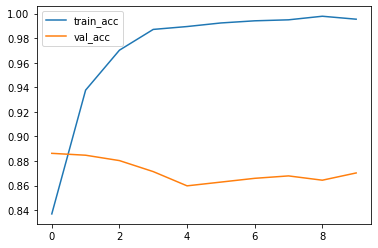

In [196]:
plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()



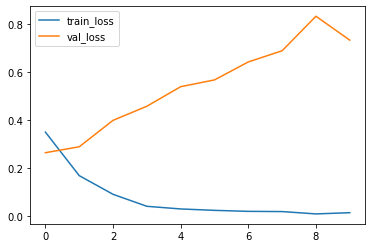

In [197]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label ='val_loss')
plt.legend()


In [198]:
y_pred = model.predict_classes(x_test)

In [199]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [200]:
confusion_matrix(y_pred , y_test)

array([[2368,  357],
       [ 236, 1611]], dtype=int64)

In [201]:
accuracy_score(y_pred, y_test)

0.8702974628171478

# User's input

In [213]:
user_inp = 'There were many forest fire'

In [214]:
#preprocessing
import time
s = time.time()
corpus = []

text = re.sub('[^a-zA-Z]' , " ", user_inp)
text = text.lower()
text = text.split()

word = [words for words in text if words not in stopwords.words('english') ]
word = " ".join(word) 
corpus.append(word)
print('done')
print((time.time() - s)*1000)

done
3.9641857147216797


In [215]:
user_one_hot = [one_hot(words , voc_size) for words in corpus]

In [216]:
user_one_hot

[[2012, 2836, 2588]]

In [217]:
# to make fixed length
max_length_of_sent = 50
embedding_sent_user = pad_sequences(user_one_hot,padding='pre' , maxlen=max_length_of_sent)
embedding_sent_user

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2012, 2836, 2588]])

In [218]:
check = np.array(embedding_sent_user)

In [219]:
model.predict_classes(check)

array([[1]])

In [220]:
# it is fake